In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML,clear_output


In [4]:
productUserdf = pd.read_csv('../input/featureextraction-nowindow-digikala/productUsertrdf.csv')
targetdf = pd.read_csv('../input/featureextraction-nowindow-digikala/targetLastDatePurchase_user-product.csv')
print(productUserdf.shape)
print(targetdf.shape)

(318050, 16)
(318050, 7)


In [5]:
productUserdf.head(2)

,Unnamed: 0,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay
0,0,577243,724112,"[nan, 12.0, 28.0, 55.0]",4,"[71, 83, 111, 166]",0.028571,0.0027,31.666667,17.745109,55.0,12.0,166,71,97.0,36.629053
1,1,577243,875550,"[nan, 25.0, 59.0]",3,"[18, 43, 102]",0.021429,0.0694,42.000000,17.000000,59.0,25.0,102,18,43.0,35.216789


In [6]:
targetdf.head(2)

,Unnamed: 0,index,user_id,product_id,created_at,diffDay,GoneDays
0,0,988009,577243,724112,2019-06-29,13.0,179
1,1,1521046,577243,875550,2019-06-16,64.0,166


In [7]:
targetdf.rename(columns = {'created_at':'created_at_target', 'diffDay':'diffDay_target',
                           'GoneDays':'GoneDays_target',
                          'index':'index_target'}, inplace = True)
targetdf.head(2)

,Unnamed: 0,index_target,user_id,product_id,created_at_target,diffDay_target,GoneDays_target
0,0,988009,577243,724112,2019-06-29,13.0,179
1,1,1521046,577243,875550,2019-06-16,64.0,166


> GoneDay is calculated based on 2019-01-01

In [8]:
df = pd.merge(left=productUserdf, right=targetdf,how='left',on=['user_id','product_id'])
df.drop(['Unnamed: 0_x','Unnamed: 0_y'],inplace=True,axis=1)
df.head(2)

,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay,index_target,created_at_target,diffDay_target,GoneDays_target
0,577243,724112,"[nan, 12.0, 28.0, 55.0]",4,"[71, 83, 111, 166]",0.028571,0.0027,31.666667,17.745109,55.0,12.0,166,71,97.0,36.629053,988009,2019-06-29,13.0,179
1,577243,875550,"[nan, 25.0, 59.0]",3,"[18, 43, 102]",0.021429,0.0694,42.000000,17.000000,59.0,25.0,102,18,43.0,35.216789,1521046,2019-06-16,64.0,166


In [9]:
data = df.sample(frac=0.95,random_state=2)
data_unseen = df.drop(data.index)
print(data.shape)
print(data_unseen.shape)

(302148, 19)
(15902, 19)


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
#seperate total number column as target variable.
target=data['GoneDays_target']
df_d= data.drop(['GoneDays_target','user_id','product_id','allDiffDay','allGoneDay',
                 'index_target','created_at_target','diffDay_target'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_d,target,test_size=0.25,random_state=42)
print('df_d.shape:',df_d.shape)
print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape)
df_d.head()

df_d.shape: (302148, 11)
x_train.shape: (226611, 11)
x_test.shape: (75537, 11)
y_train.shape: (226611,)
y_test.shape: (75537,)


,LenOfList,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay
312751,3,1.000000,0.0006,4.000000,0.000000,4.0,4.0,147,139,143.0,3.265986
268181,4,0.160000,0.0115,30.666667,6.944222,37.0,21.0,100,8,46.0,34.907019
179685,3,0.057692,0.0012,91.000000,17.000000,108.0,74.0,211,29,103.0,74.732114
80237,4,0.013652,0.0025,54.666667,46.657142,120.0,14.0,216,52,126.0,71.958321
5589,4,0.210526,0.0068,54.333333,61.331522,141.0,8.0,207,44,122.5,76.213516


In [18]:
x_train.head(2)

,LenOfList,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay
203907,3,0.035714,0.0619,42.0,23.000000,65.0,19.0,303,219,284.0,35.966033
258176,4,0.002087,0.0008,4.0,1.414214,5.0,2.0,169,157,164.5,4.656984


In [19]:
y_train[:2]

203907    312
258176    174
Name: GoneDays_target, dtype: int64

In [20]:
columns = ['LenOfList','avgDiffDay','stdDiffDay','maxDiffDay','minDiffDay','maxGoneDay','minGoneDay','medianGoneDay','stdGoneDay']
ct_norm   = ColumnTransformer(transformers=[('minmax', MinMaxScaler(), columns)], remainder='passthrough')
ct_standr = ColumnTransformer(transformers=[('standr', StandardScaler(), columns)], remainder='passthrough')

In [21]:
def fit_eval_model(model, x_train, y_train, x_test, y_test, metricList):
    m = model
    m.fit(x_train,y_train)
    y_train_pred = m.predict(x_train)
    y_test_pred = m.predict(x_test)
    metricDataframe =pd.DataFrame()
    for name,metric in metricList:
        metricDataframe[name+'_train'] = [round(metric(y_train,y_train_pred),3)]
        metricDataframe[name+'_test'] = [round(metric(y_test,y_test_pred),3)]
    return metricDataframe,y_train_pred,y_test_pred,m

In [22]:
metricList = [('r2_score',r2_score),('MSE',mean_squared_error)]
randomForestR1_result = fit_eval_model(RandomForestRegressor(random_state=0,n_jobs=-1),
                                       x_train, y_train, x_test, y_test, metricList)
randomForestR1_result[0]

,r2_score_train,r2_score_test,MSE_train,MSE_test
0,0.973,0.808,162.633,1160.306


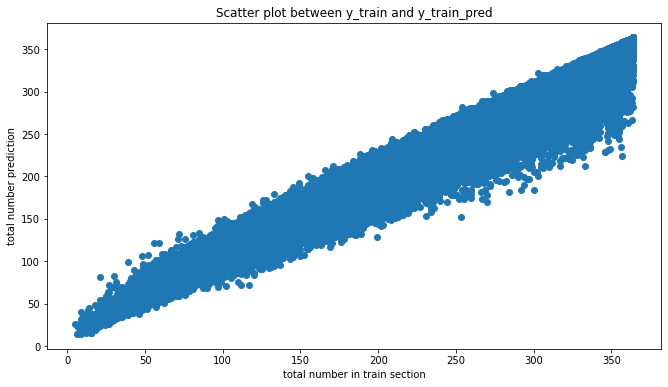

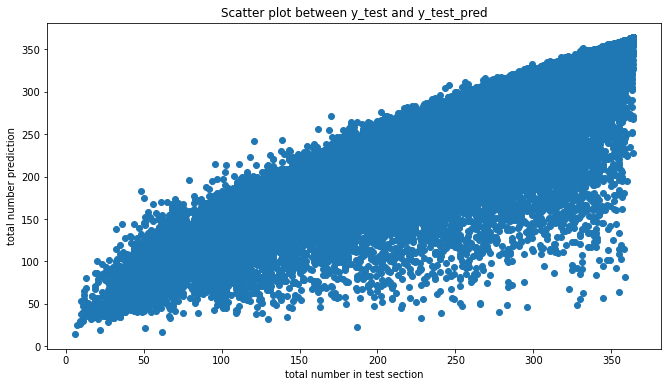

In [23]:
plt.figure(figsize=(11,6))
plt.scatter(y_train,randomForestR1_result[1])
ax = plt.gca()
ax.set(title='Scatter plot between y_train and y_train_pred')
ax.set_xlabel('total number in train section')
ax.set_ylabel('total number prediction');

plt.figure(figsize=(11,6))
plt.scatter(y_test,randomForestR1_result[2])
ax = plt.gca()
ax.set(title='Scatter plot between y_test and y_test_pred')
ax.set_xlabel('total number in test section')
ax.set_ylabel('total number prediction');

In [24]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [25]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestRegressor(n_jobs=-1)
params = dict()
params['n_estimators']=[2,5,10,30,100,200]
params['max_depth'] = [1,2,5,10,20,None]
params['min_samples_split']=[2,5,10,20,50,100]
params['min_samples_leaf']=[1,2,5,10,20,50,100]
params['max_features']=[1,2,3,5,7,11]
#params['criterion']=['squared_error','poisson']
scoring = ['r2','neg_mean_squared_error','neg_mean_absolute_error','neg_mean_poisson_deviance']

In [26]:
search = RandomizedSearchCV(model, params, n_iter=20, scoring=scoring, n_jobs=-1, cv=cv,
                            random_state=1,return_train_score=True,refit='neg_mean_squared_error')

In [27]:
result = search.fit(df_d, target)

In [28]:
result.scorer_

{'r2': make_scorer(r2_score),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False)}

In [29]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -1113.1502200260684
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 10}


In [30]:
data_unseen.head(2)

,user_id,product_id,allDiffDay,LenOfList,allGoneDay,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay,index_target,created_at_target,diffDay_target,GoneDays_target
85,578067,1764220,"[nan, 10.0, 9.0, 14.0, 10.0]",5,"[185, 195, 204, 218, 228]",1.0,0.0019,10.75,1.920286,14.0,9.0,228,185,204.0,15.453155,1325214,2019-08-24,7.0,235
92,578185,629577,"[nan, 60.0, 23.0]",3,"[235, 295, 318]",1.0,0.0074,41.50,18.500000,60.0,23.0,318,235,295.0,34.988887,805511,2019-12-06,21.0,339


In [31]:
#seperate total number column as target variable.
unseenTarget=data_unseen['GoneDays_target']
df_d_unseen= data_unseen.drop(['GoneDays_target','user_id','product_id','allDiffDay','allGoneDay',
                 'index_target','created_at_target','diffDay_target'],axis=1)

In [32]:
df_d_unseen.head(3)

,LenOfList,ProductProbPerUser,ProductProb,avgDiffDay,stdDiffDay,maxDiffDay,minDiffDay,maxGoneDay,minGoneDay,medianGoneDay,stdGoneDay
85,5,1.000000,0.0019,10.75,1.920286,14.0,9.0,228,185,204.0,15.453155
92,3,1.000000,0.0074,41.50,18.500000,60.0,23.0,318,235,295.0,34.988887
95,4,0.235294,0.0014,74.00,27.067816,101.0,37.0,239,17,96.0,85.431259


In [39]:
data_unseen.to_csv('data_unseen.csv')

In [33]:
unseen_predic=result.predict(df_d_unseen)

In [34]:
mean_squared_error(unseenTarget,unseen_predic)

1106.765739822059

In [35]:
r2_score(unseenTarget,unseen_predic)

0.8179180796136619

In [37]:
import joblib

In [38]:
joblib.dump(result, 'randomForestModel1.pkl')

['randomForestModel1.pkl']